# Auditory Demonstrations
# The Decibel Scale (Demo 4 on IPO CD)

Based on:   
**Auditory Demonstrations**[https://research.tue.nl/en/publications/auditory-demonstrations], *A.J.M. Houtsma, Th.D. Rossing, W.M. Wagemakers*, Technische Universiteit Eindhoven, Institute for Perception Research, 1987

Original Booklet with full documentation on the demo[https://pure.tue.nl/ws/portalfiles/portal/79033010/402660.pdf]


## First do all the imports


In [9]:
%matplotlib inline
import os,sys,io 
import scipy.signal

from urllib.request import urlopen
from IPython.display import display, Audio, HTML

import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 

import librosa as librosa
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
try:
  import soundfile as sf
except:
  ! pip -q install soundfile
  import soundfile as sf
    
from spectrogram_utils import *

In the first part of this demonstration, we hear broadband noise reduced in steps of
6, 3, and 1 dB in order to obtain a feeling for the decibel scale

In [10]:
root = 'http://homes.esat.kuleuven.be/~compi/demos/'
fname = 'AuditoryDemonstrations/TrackNo08.wav'
url = root+fname
wavdata, samplerate = read_mono_from_url(root+fname)
#sd.play(wavdata,samplerate)
# plt.plot(wavdata)
n_shift = int(samplerate/100)
instructions = wavdata[:1200*n_shift]
demo = wavdata[1200*n_shift:]

In [11]:
# Listen to the Instructions
Audio(data=instructions,rate=samplerate,autoplay=False)

In [12]:
# Play Demo
Audio(data=demo,rate=samplerate,autoplay=False)

Text(0, 0.5, 'Frequency Coefficient')

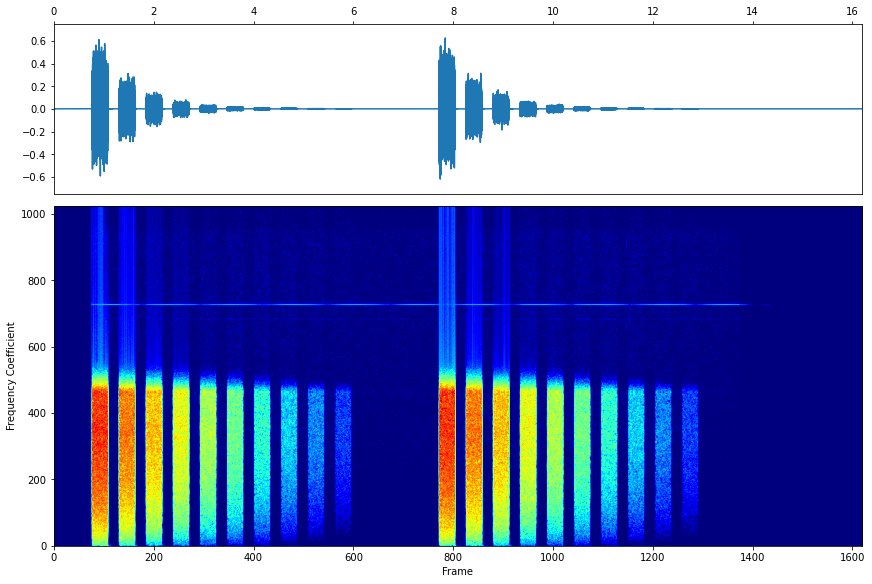

In [5]:
# Look at a Spectrogram of the Demo
spg = spectrogram(demo,samplerate=samplerate,n_fft=2048)
fig=plot_spg(spg=[spg], wav=demo, samplerate=samplerate, n_shift=441)
ax = fig.get_axes()
ax[1].set_xlabel('Frame')
ax[1].set_ylabel('Frequency Coefficient')

(-60.0, 0.0)

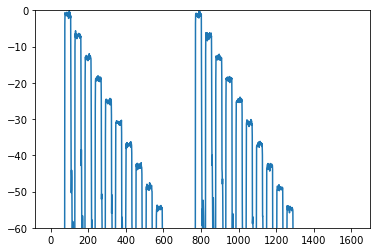

In [6]:
# intensity function in dB
# we measure intensity as  10. * log10(SUM(x^2)/N) + 14
# - the +15 offset is arbitrary
# - the EPS of 1.e-10 yields a range of around 60dB
# 
EPS = 1.e-10
OFFSET = 15.0
def intensity(y,n_shift):
    nfr = int(len(y)/n_shift)
    energy = np.zeros((nfr,))
    for ifr in range(0,nfr):
        energy[ifr] = np.sum(np.square(y[ifr*n_shift:(ifr*n_shift+n_shift)]))/float(n_shift)
    return(10*np.log10(energy+EPS) + OFFSET)

en = intensity(demo,n_shift)
plt.plot(en)
plt.ylim([-60,0])
        

In [77]:
def make_row_grid(heights=[1.,3.],figsize=(10,4)):
    fig = plt.figure(figsize=figsize,clear=True,constrained_layout=True)
    nrows = len(heights)
    gs = fig.add_gridspec(nrows=nrows,ncols=1,height_ratios=heights)
    ax = []
    for i in range(0,nrows):
        axx = fig.add_subplot(gs[i,0])
        ax.append(axx)
    return(fig,ax)

def add_line_plot(ax,y,x=None,xscale=1.,yscale=1.):
    if x==None:
        x = np.arange(len(y)) / xscale
    ax.plot(x,y)
    ax.set_xlim(0,x[-1])
    
def add_img_plot(ax,img,xscale=1.,yscale=1.,xlabel=True):
    (nr,nc)= img.shape
    print(nr,nc)
    extent = [-0.5, (float(nc)-.5)/xscale, -.5, (float(nr)-.5)/yscale]
    ax.imshow(img,cmap='jet',aspect='auto',origin='lower',extent=extent)

    if(xlabel):
        ax.tick_params(axis='x',labelbottom=True)
    else:
        ax.tick_params(axis='x',labelrotation=0.0,labelbottom=False,bottom=True)     

# xscale here is a hack, as we really should pass xlim
def add_seg_plot(ax,df,xscale=1.,yscale=1.):
    plot_seg(ax,df,xlim=[0.,xscale])
    
def make_row_plot(traces,figsize=(10,4),
            styles=['line'],heights=[1.],xlabels=[''],xscale=[1.],yscale=[1.]):
    nrows=len(traces)
    if len(styles) < nrows : styles=[styles[0]]*nrows
    if len(heights) < nrows: heights=[heights[0]]*nrows
    if len(xlabels) < nrows: xlabels=[xlabels[0]]*nrows
    if len(xscale) < nrows: xscale=[xscale[0]]*nrows
    if len(yscale) < nrows: yscale=[yscale[0]]*nrows
        
    fig,ax = make_row_grid(heights=heights,figsize=figsize)        
    for i in range(0,nrows): 
        if styles[i] == 'line': add_line_plot(ax[i],traces[i],xscale=xscale[i],yscale=yscale[i])
        elif styles[i] == 'img': add_img_plot(ax[i],traces[i],xscale=xscale[i],yscale=yscale[i])
        elif styles[i] == 'seg': add_seg_plot(ax[i],traces[i],xscale=xscale[i],yscale=yscale[i])
        if (i==0) & (nrows>1):
            ax[i].tick_params(axis='x',labeltop=True,top=True,labelbottom=False,bottom=False) 
        elif i==(nrows-1):
            ax[i].tick_params(axis='x',labelbottom=True)
        else:
            ax[i].tick_params(axis='x',labeltop=False,top=False,labelbottom=False,bottom=False)            
    return(fig,ax)
                       

257 309


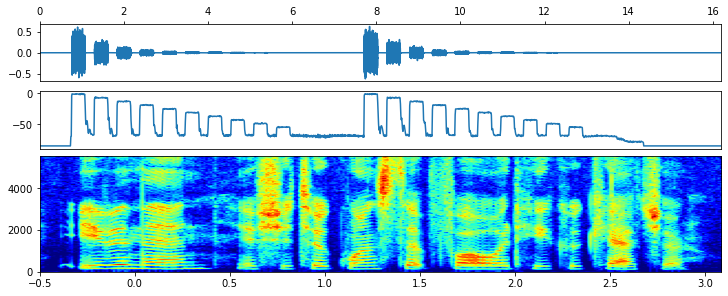

In [61]:
(fig,ax) = make_row_plot([demo,en,spg],styles=['line','line','img'],heights=[1.,1.,2.],
                         xscale=[samplerate,100,100],yscale=[1.,1.,2048./44100.])
plt.close()
display(fig)

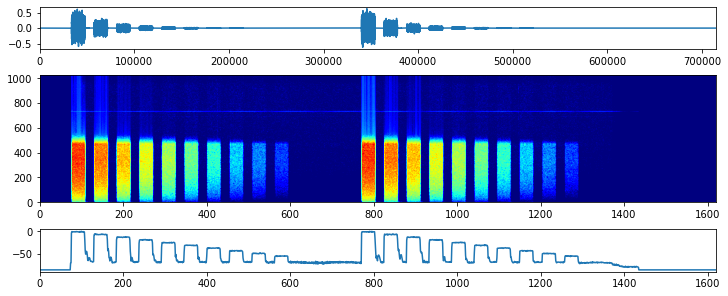

In [8]:
fig1,ax1 = make_row_grid(heights=[1.,3.,1.])
add_line_plot(ax1[0],demo)
add_img_plot(ax1[1],spg)
add_line_plot(ax1[2],en)

In [ ]:
en[1620-1]=-83.4

In [ ]:
en[1600:]

In [ ]:
en[-1:]

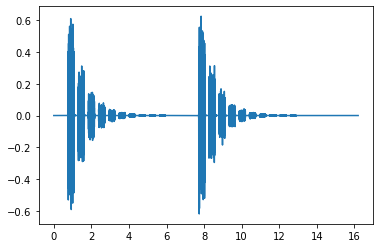

In [14]:
times = np.arange(len(demo)) / samplerate
plt.plot(times,demo)

In [24]:
xx = ['img']*5


In [25]:
xx=[xx[0]]*8

In [26]:
xx

['img', 'img', 'img', 'img', 'img', 'img', 'img', 'img']

In [48]:
dir='https://raw.githubusercontent.com/compi1234/spchlab/master/data/'
wavfile = "timit/si1027.wav" #@param {type:"string"}
sent_segmentation = "timit/si1027.txt" #@param {type:"string"}
word_segmentation = "timit/si1027.wrd" #@param {type:"string"}
phone_segmentation = "timit/si1027.phn" #@param {type:"string"}
word_segmentation = "timit/si1027.wrd" #@param {type:"string"}
phone_mapping = "timit/phones-61-48-39.txt" #@param {type:"string"}

# read the datafiles
wavdata, sr = read_audio_from_url(dir+wavfile)
transcript = io.StringIO(urlopen(dir+sent_segmentation).read().decode('utf-8')).readline().strip().split(None,2)[2]
segwrd = pd.read_csv(dir+word_segmentation,delim_whitespace=True,names=['t0','t1','seg'])
segphn = pd.read_csv(dir+phone_segmentation,delim_whitespace=True,names=['t0','t1','seg'])

# convert sample based segmentations to time based segmentations
segphn['t0']=indx2t(segphn['t0'],sr)
segphn['t1']=indx2t(segphn['t1'],sr)
segwrd['t0']=indx2t(segwrd['t0'],sr)
segwrd['t1']=indx2t(segwrd['t1'],sr)

# convert TIMIT61 to TIMIT39
# this routine is not great as it simply maps closures to silence instead to combining
phone_tbl = pd.read_csv(dir+phone_mapping,delim_whitespace=True,names=['T61','T48','T39'])
map61_39 = dict(zip(phone_tbl['T61'],phone_tbl['T39']))
segphn39 = segphn.replace({"seg": map61_39})

Text(0, 0.5, 'mel fbank(24)')

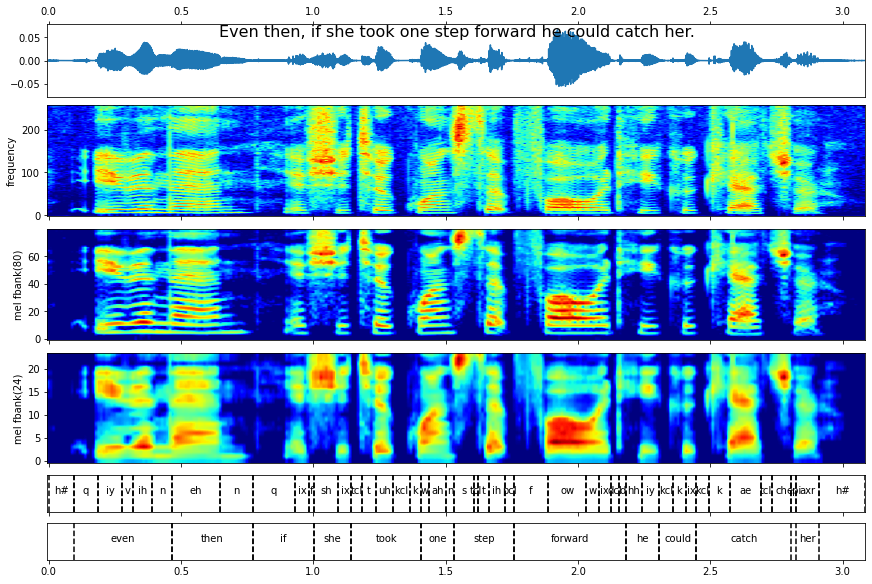

In [49]:
# compute a standard spectrogram and a 80 and 24 channel mel filterbank
spg = spectrogram(wavdata,samplerate=sr,n_mels=None)
spg80 = spectrogram(wavdata,samplerate=sr,n_mels=80)
spg24 = spectrogram(wavdata,samplerate=sr,n_mels=24)
# display audio button and the spectrograms ; add additional lables
display(Audio(data=wavdata,rate=sr))
fig=plot_spg(spg=[spg,spg80,spg24], wav=wavdata, seg=[segphn,segwrd],txt=transcript,figsize=(12,8),spg_scale=1.5)
ax = fig.get_axes()
ax[1].set_ylabel('frequency')
ax[2].set_ylabel('mel fbank(80)')
ax[3].set_ylabel('mel fbank(24)')

257 309
80 309


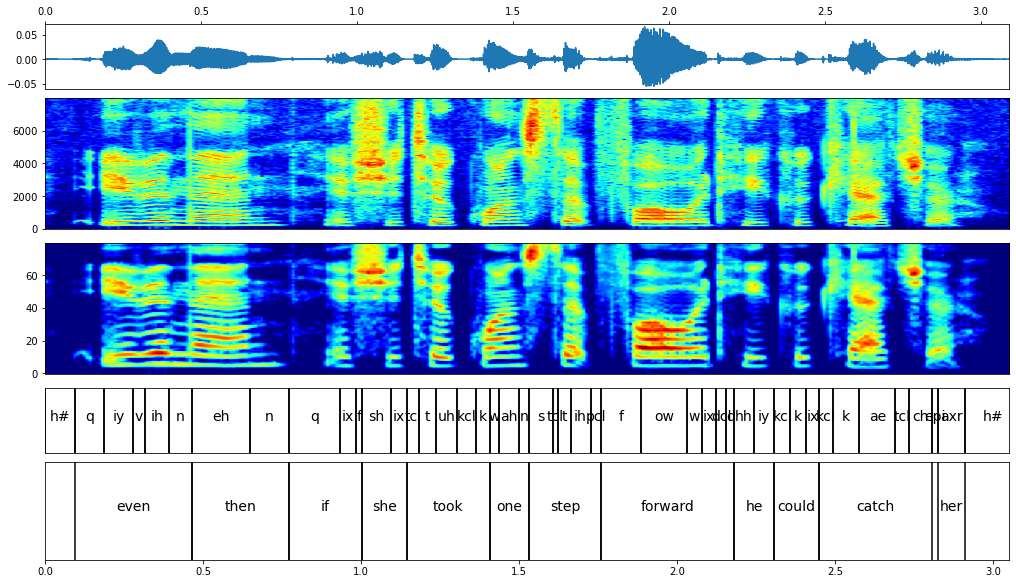

In [80]:
(fig,ax) = make_row_plot([wavdata,spg,spg80,segphn,segwrd],figsize=(14,8),styles=['line','img','img','seg','seg'],heights=[1.,2.,2.,1.,1.5],
                         xscale=[sr,100,100,3.05,3.05],yscale=[1.,257./8000,1.,1.,1.])
plt.close()
display(fig)

257 309


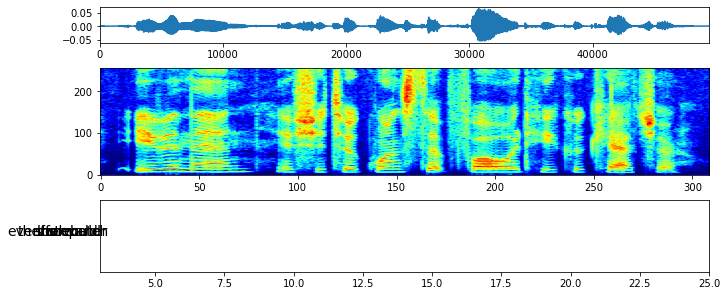

In [75]:
fig2,ax2 = make_row_grid(heights=[1.,3.,2.])
add_line_plot(ax2[0],wavdata)
add_img_plot(ax2[1],spg)
plot_seg(ax2[2],segwrd,xlim=[3.,25.0])